# Lecture 4

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 4\Default.csv", 
                 encoding='utf-8', index_col=0)
df['default'] = [1 if x=='Yes' else 0 for x in df['default'].tolist()]
df['student'] = [1 if x=='Yes' else 0 for x in df['student'].tolist()]

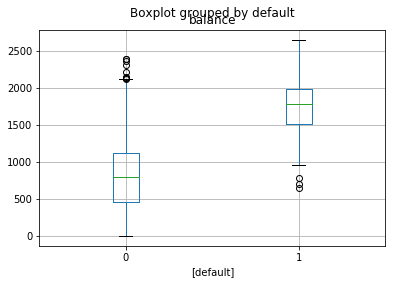

In [69]:
df[['balance', 'default']].boxplot(by='default')

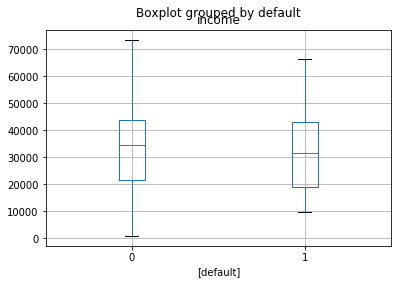

In [70]:
df[['income', 'default']].boxplot(by='default')

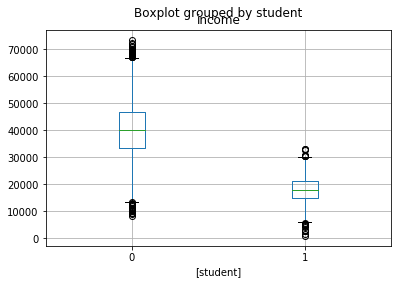

In [71]:
df[['income', 'student']].boxplot(by='student')

In [72]:
df.describe()

,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462905
50%,0.000000,0.000000,823.636973,34552.644800
75%,0.000000,1.000000,1166.308387,43807.729275
max,1.000000,1.000000,2654.322576,73554.233500


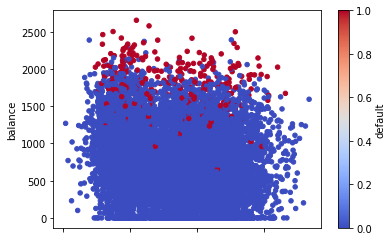

In [75]:
df.plot.scatter(x='income', y='balance', c='default', colormap='coolwarm')

## Notes:
- Linear function is an approximation of a monotonic function
- Logit is the inverse of the sigmoid function
- Polynomial regression is linear regression in a polynomial space

# Auto Data

In [83]:
auto = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 4\Auto.csv",
                  encoding='utf-8', na_values=['?'], na_filter=True)
auto = auto.dropna()

In [88]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002445AB7CF98>,
      dtype=object)

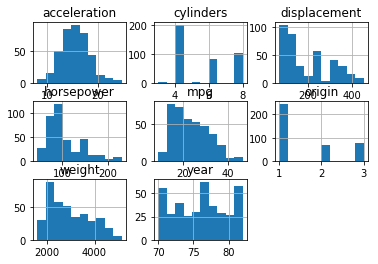

In [89]:
auto.hist()

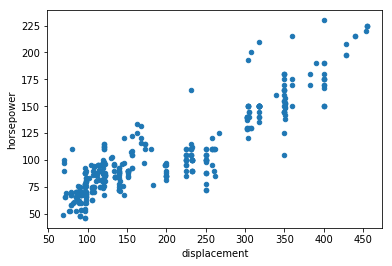

In [93]:
auto.plot.scatter(x="displacement", y="horsepower")

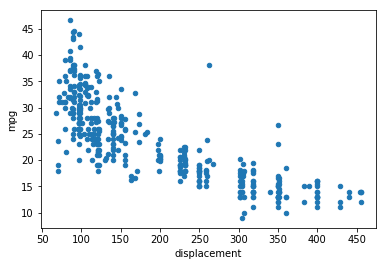

In [104]:
auto.plot.scatter(x="displacement", y="mpg")

# Plot Regression Plot in Seaborn (usefull in a pinch)

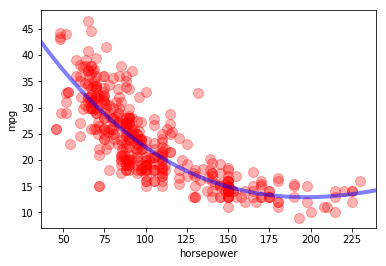

In [133]:
sns.regplot(x='horsepower', y='mpg', data=auto, ci=False,
           scatter_kws={'color':'r', 'alpha':0.3, 's':100},
           line_kws={'color':'b', 'alpha':0.5, 'lw':4},
           marker="o", order=3)

## Leave One Out Approach

In [140]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
loo = LeaveOneOut()
loo.get_n_splits(auto)

392

#### loo.split(auto) splits a single index test_i away and the rest of the indexes are in train_i for every possible combination of the split

In [150]:
X = auto[['horsepower']].values
y = auto['mpg'].values

rss = np.zeros(auto.shape[0])
i = 0
for train_i, test_i in loo.split(auto):
    lr = LinearRegression()
    lr = lr.fit(X[train_i], y[train_i])
    rss[i] = (lr.predict(X[test_i]) - y[test_i])**2
    i += 1
np.sum(rss)

9498.753299028256

In [151]:
X = auto[['horsepower', 'displacement']].values
y = auto['mpg'].values

rss = np.zeros(auto.shape[0])
i = 0
for train_i, test_i in loo.split(auto):
    lr = LinearRegression()
    lr = lr.fit(X[train_i], y[train_i])
    rss[i] = (lr.predict(X[test_i]) - y[test_i])**2
    i += 1
np.sum(rss)

8147.185205052872

### Including displacement decreases the error in the prediction - keep it

In [152]:
X = auto[['horsepower', 'displacement', 'acceleration']].values
y = auto['mpg'].values

rss = np.zeros(auto.shape[0])
i = 0
for train_i, test_i in loo.split(auto):
    lr = LinearRegression()
    lr = lr.fit(X[train_i], y[train_i])
    rss[i] = (lr.predict(X[test_i]) - y[test_i])**2
    i += 1
np.sum(rss)

7953.374591400034

In [153]:
X = auto[['horsepower', 'displacement', 'acceleration', 'weight']].values
y = auto['mpg'].values

rss = np.zeros(auto.shape[0])
i = 0
for train_i, test_i in loo.split(auto):
    lr = LinearRegression()
    lr = lr.fit(X[train_i], y[train_i])
    rss[i] = (lr.predict(X[test_i]) - y[test_i])**2
    i += 1
np.sum(rss)

7189.117742257378

In [154]:
X = auto[['horsepower', 'displacement', 'acceleration', 'weight', 'cylinders']].values
y = auto['mpg'].values

rss = np.zeros(auto.shape[0])
i = 0
for train_i, test_i in loo.split(auto):
    lr = LinearRegression()
    lr = lr.fit(X[train_i], y[train_i])
    rss[i] = (lr.predict(X[test_i]) - y[test_i])**2
    i += 1
np.sum(rss)

7199.699310474408

### It doesn't look like including cylinders helps....